In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df =pd.read_csv( "diamonds_hw.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [ ]:
#Dari df.info di ketahui bahwa terdapat missing value di kolom carat, untuk itu kolom ini akan dianalisa lebih lanjut

In [5]:
df[df.carat.isna()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [ ]:
#Ada 125 rows yang missing, akan diisi dengan menganalisa outlier terlebih dahulu

<Axes: xlabel='carat'>

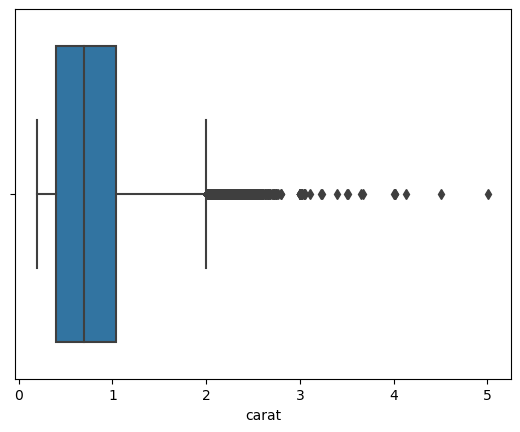

In [6]:
sns.boxplot(x=df.carat)

In [ ]:
#dari boxplotnya diketahui banyak outlier > 2, untuk itu kolom yang missing akan diisi dengan median

In [7]:
df.carat = df.carat.fillna(df.carat.median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#setelah diisi dengan median, kolom carat sudah sama jumlah rownya yang terisi dengan kolom lainnya yaitu 53940 rows

Saya memilih metode diatas untuk mengisi missing value pada kolom 'carat' dengan median karena terdapat banyak outlier

#### Nomor 2:

In [9]:
#Diketahui bahwa kolom clarity memiliki tingkatan terburuk hingga terbaik(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
clar2num = [{"clarity":"I1", "clar_num":1},
           {"clarity":"SI2", "clar_num":2},
           {"clarity":"SI1", "clar_num":3},
           {"clarity":"VS2", "clar_num":4},
           {"clarity":"VS1", "clar_num":5},
           {"clarity":"VVS2", "clar_num":6},
           {"clarity":"VVS1", "clar_num":7},
           {"clarity":"IF", "clar_num":8}]
clar2num

[{'clarity': 'I1', 'clar_num': 1},
 {'clarity': 'SI2', 'clar_num': 2},
 {'clarity': 'SI1', 'clar_num': 3},
 {'clarity': 'VS2', 'clar_num': 4},
 {'clarity': 'VS1', 'clar_num': 5},
 {'clarity': 'VVS2', 'clar_num': 6},
 {'clarity': 'VVS1', 'clar_num': 7},
 {'clarity': 'IF', 'clar_num': 8}]

In [11]:
clar2num = pd.DataFrame(clar2num)

In [12]:
pd.merge(df, clar2num, on="clarity", how="inner")

,carat,cut,color,clarity,depth,table,price,x,y,z,clar_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
2,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,2
3,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,2
4,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68,2
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.54,Ideal,F,IF,62.2,54.0,2729,5.24,5.27,3.27,8
53936,0.51,Ideal,F,IF,62.5,54.0,2730,5.12,5.16,3.21,8
53937,0.52,Ideal,F,IF,61.7,57.0,2733,5.13,5.17,3.18,8
53938,0.52,Ideal,F,IF,61.5,57.0,2749,5.15,5.19,3.18,8


#### Nomor 3:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [14]:
df.carat.describe()

count    53940.000000
mean         0.797664
std          0.473517
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [15]:
#mencari nilai quartil dari x
q1, q2, q3 = df.x.quantile([0.25, 0.50, 0.75])

In [16]:
q1

4.71

In [17]:
q2

5.7

In [18]:
q3

6.54

In [19]:
iqr = q3 - q1
iqr

1.83

In [20]:
batasatas = q3 + 1.5*iqr
batasatas

9.285

In [21]:
batasbawah = q1 - 1.5*iqr
batasbawah

1.9649999999999999

<Axes: xlabel='x'>

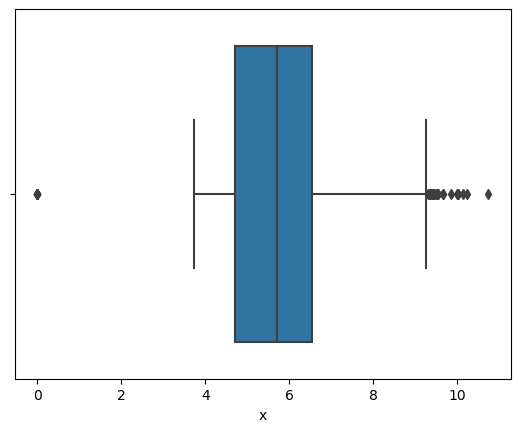

In [22]:
sns.boxplot(x=df["x"])

In [23]:
xlier = df[(df['x']<batasbawah) | (df['x']>batasatas)]
xlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 11182 to 49557
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    32 non-null     float64
 1   cut      32 non-null     object 
 2   color    32 non-null     object 
 3   clarity  32 non-null     object 
 4   depth    32 non-null     float64
 5   table    32 non-null     float64
 6   price    32 non-null     int64  
 7   x        32 non-null     float64
 8   y        32 non-null     float64
 9   z        32 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ KB


In [24]:
#mencari nilai quartil dari y
q1, q2, q3 = df.y.quantile([0.25, 0.50, 0.75])

In [25]:
q1

4.72

In [26]:
q2

5.71

In [27]:
q3

6.54

In [28]:
iqr = q3 - q1
iqr

1.8200000000000003

In [29]:
batasatas = q3 + 1.5*iqr
batasatas

9.27

In [30]:
batasbawah = q1 - 1.5*iqr
batasbawah

1.9899999999999993

<Axes: xlabel='y'>

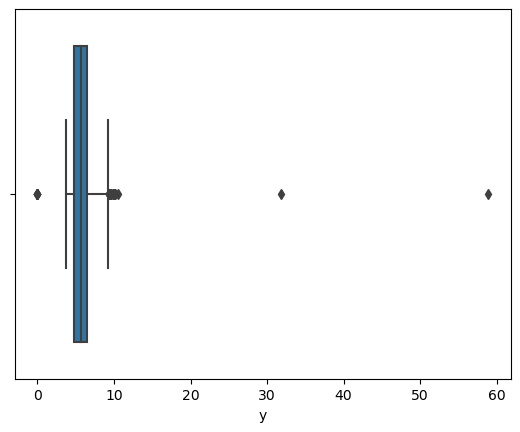

In [31]:
sns.boxplot(x=df["y"])

In [42]:
ylier = df[(df['y']<batasbawah) | (df['y']>batasatas)]
ylier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26353 entries, 91 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26353 non-null  float64
 1   cut      26353 non-null  object 
 2   color    26353 non-null  object 
 3   clarity  26353 non-null  object 
 4   depth    26353 non-null  float64
 5   table    26353 non-null  float64
 6   price    26353 non-null  int64  
 7   x        26353 non-null  float64
 8   y        26353 non-null  float64
 9   z        26353 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [32]:
#mencari nilai quartil dari z
q1, q2, q3 = df.z.quantile([0.25, 0.50, 0.75])

In [33]:
q1

2.91

In [34]:
q2

3.53

In [35]:
q3

4.04

In [36]:
iqr = q3 - q1
iqr

1.13

In [37]:
batasatas = q3 + 1.5*iqr
batasatas

5.734999999999999

In [38]:
batasbawah = q1 - 1.5*iqr
batasbawah

1.2150000000000003

<Axes: xlabel='z'>

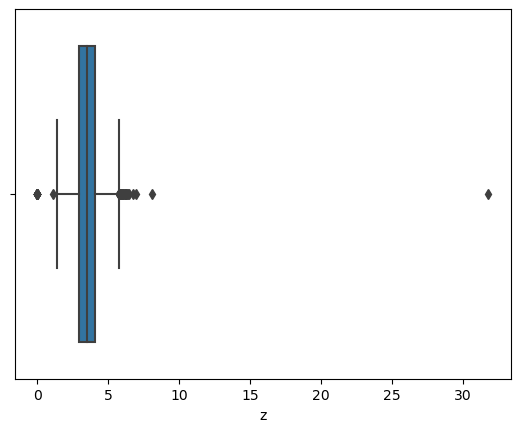

In [39]:
sns.boxplot(x=df["z"])

In [43]:
zlier = df[(df['z']<batasbawah) | (df['z']>batasatas)]
zlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2207 to 51506
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49 non-null     float64
 1   cut      49 non-null     object 
 2   color    49 non-null     object 
 3   clarity  49 non-null     object 
 4   depth    49 non-null     float64
 5   table    49 non-null     float64
 6   price    49 non-null     int64  
 7   x        49 non-null     float64
 8   y        49 non-null     float64
 9   z        49 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ KB


In [ ]:
Jadi pada boxplot kolom x,y,z terdapat outlier dibaris yang berbeda yaitu
kolom x :batas bawahnya 1.9649999999999993, batas atasnya 9.285, dan outlier ada 32 baris,mulai dari baris 11182 ke baris 49557
kolom y :batas bawahnya 1.9899999999999993, batas atasnya 9.27, dan outlier ada 26353 baris, dari baris 91 ke baris 53939
kolom y :batas bawahnya 1.2150000000000003, batas atasnya 5.734999999999999, dan outlier ada 49 baris, dari baris 2207 ke baris 51506
        